<a href="https://colab.research.google.com/github/PrincetonUniversity/intro_machine_learning/blob/main/day2/Intro_Machine_Learning_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# NOTE: If you are using JupyterLite, uncomment the following line!
# import piplite; await piplite.install('seaborn')

# import libraries used during this workshop
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Data collected from red or white wines

Our wine data has the following variables:

----

1. **fixed acidity**: Most acids in wine are "fixed" or nonvolatile (do not evaporate readily).
2. **volatile acidity**: The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
3. **citric acid**: Found in small quantities, citric acid can add 'freshness' and flavor to wines.
4. **residual sugar**: The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter.
5. **chlorides**: The amount of salt in the wine.
6. **free sulfur dioxide**: The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents.
7. **quality**: based on sensory data, score between 0 and 10.
8. **density**: The density of water is close to that of water depending on the percent alcohol and sugar content.
9. **pH**: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4.
10. **sulphates**: A wine preservative which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial.
11. **alcohol**: The percent alcohol content of the wine.
12. **total sulfur dioxide**: Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2.

----

### Which variable should be our ***response***, with the rest being ***features***? Sometimes it's not obvious and depends on your interests!

Load data into a Pandas [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) using the `read_csv()` function, which can read a table on your computer are directly from a URL!.

In [ ]:
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# these data are in text tables in which the separation of columns is indicated with a semicolon ";"
red_df = pd.read_csv(url_red, sep=";")
white_df = pd.read_csv(url_white, sep=";")

# NOTE: If using JupyterLite, comment out the above lines and use the following instead:
# red_df = pd.read_csv("winequality-red.csv", sep=";")
# white_df = pd.read_csv("winequality-white.csv", sep=";")

Let's do some brief exploratory data analysis to familiarize ourselves with the data.

In [ ]:
# DataFrame.head() let's us peek at the first few lines of our data table
red_df.head()

In [ ]:
# get more info about our DataFrame: data types and missing data!
red_df.info()

What does the full distribution of each feature look like?


In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})

# as histogram
red_df.hist(bins=20,color='darkblue')

# as boxplot
# red_df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, color='darkblue')

### What about these measurements, if anything, stands out?

In [ ]:
# check how many high/low quality wines there actually are
red_df['quality'].value_counts()

# K-Nearest Neighbors (KNN) regression

In practice we should think about our features more, but let's press forward and build a ML model to predict **quality**!

Later, we'll step back and think about how we can improve the model, and in the process demonstrate common best practices in ML and show how they *actually* make a difference in model performance.

These best practices apply to many other ML methods such as neural networks, but we'll use KNN to demonstrate.

We've decided what our features and response are, let's create renamed data tables storing these variables to make life easier.

In [ ]:
response = red_df['quality']
features = red_df.drop(['quality'], axis=1)

## Split data into training/testing subsets

Let's use 70% of the data for training and 30% for testing, using `train_test_split` function (detailed description [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In the context of KNN on these wine data: we'll use 70% of our data to make **quality** predictions about the other 30% that we held out.

That is, for each sample in our test data, we'll find it's nearest neighbors in the training data and use these to make a prediction.

We can then compare these predictions to the true values to assess performance!


In [ ]:
# Here we will split our features (X) and response (Y) data into 2 categories each: _train and _test
# We change names to X and Y as this is common in scikit learn tutorials and makes code shorter

X_train, X_test, Y_train, Y_test = train_test_split(features, response, test_size=0.30, random_state=11)
print("X_train dimensions ", X_train.shape)
print("X_test dimensions ", X_test.shape)

Our data are ready for modeling.

We'll first 'initialize' our KNN regression model by specifying some parameters. We have to make some choices:
1. How many neighbors (*K*) should we use for regression?
2. Of the *K* nearest neighbors, should ones further away be treated the same as those nearby?
  - `uniform`: all neighbors equal
  - `distance`: weight neighbors by inverse of distance from data point
3. How do we measure distance between data points to calculate "nearness"? Let **d** be a vector of differences between a test sample and training sample, one element for each feature
  - `l1`: L1 norm (Manhattan distance), $\sum_{i=1}^{n} |d_i|$
  - `l2`: L2 norm (Euclidean distance), $\sqrt{\sum_{i=1}^{n} d_{i}^2}$


### How would you decide which options to use?

In [ ]:
# Initialize kNN; here you could e.g. use one of scikit learn's neural networks
knn = KNeighborsRegressor(n_neighbors=3, weights="uniform", metric='l2')

Now we can give our model the training data.

In [ ]:
# Give our KNN model the training data for model fitting
knn.fit(X_train, Y_train)

Let's use this model to make predictions with our test data using the `.predict()` function and compare these with the true values. We will store all this information in another DataFrame and to analyze how we did.

In [ ]:
# predict values from the test set, create a DataFrame
predictions =  knn.predict(X_test)
results = pd.DataFrame.from_dict({"truth" : Y_test, "prediction" : predictions})

results.head()

### Using this table, briefly examine how we did.

Compute the mean absolute value of the differences between the truth and prediction columns. You can use the following functions:
- abs()
- np.mean()

In [ ]:
# my detailed plot of regression performance

# set some variables for creating a plot
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(10,5)})
p = results.boxplot(column="prediction", by="truth", fontsize=15,
                boxprops=dict(linestyle='-', linewidth=4),
                medianprops=dict(linestyle='-', linewidth=4))
p.set(xlabel="true value", ylabel="predicted values", title="")


## Evaluate model

Scikit-learn has a function to calculate an overall model [`score`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.score:~:text=of%20the%20prediction.-,The%20coefficient%20of%20determination,score%20of%200.0.,-Parameters%3A) called the **coefficient of determination**:

$\displaystyle \huge R = 1-\frac{\sum_{i} (y_i - \hat{y}_i)^2}{\sum_{i} (y_i - \bar{y})^2}$


The part on the right divides the sum of squared differences between our predictions ($\hat{y}_i$) and true values ($y_i$) by the sum of squared differences between true values ($y_i$) and the overall mean ($\bar{y}$). This is like comparing our 'fancy' predictions with the simplest predictor possible: assign every new sample the mean value.

So, this score essentially compares by well we do relative to just using the mean.

**1 is good, 0 is bad**.

In [ ]:
# score() returns the coefficient of determination of the prediction
# note that our knn object has the training data already stored within it, so we only give it the test data here
print(knn.score(X_test, Y_test))

# or by hand, to show how it's calculated
RSS = ((Y_test - knn.predict(X_test))** 2).sum()
TSS = ((Y_test - Y_test.mean()) ** 2).sum()
print(1-(RSS/TSS))

At least it's not zero?

This score was for a single parameterization of the KNN model. We can try other parameterizations as mentioned above:

1. different *K* values (number of neighbors)
2. different weight functions (`uniform` or `distance`)
3. different distance metrics (`l1` or `l2`)

Experiment with some other parameters using the cell below which re-trains and re-scores the model. Do other values make a difference? What's the highest value you observe?

In [ ]:
# Initialize, fit, predict
knn = KNeighborsRegressor(n_neighbors=3, weights="uniform", metric='l2')
knn.fit(X_train, Y_train)
print(knn.score(X_test, Y_test))


We will tune our model by finding the combination of parameter values that gives us the highest score!

To automate this model tuning, let's put this code for model fitting and scoring into a single function `get_scores` which we can give a list of *K* values, a weighting function, and a distance function.

This function will then return a list of scores, one for each value of *K*.

In [ ]:
def get_scores(x_train,
                x_test,
                y_train,
                y_test,
                k_values,
                weight_function,
                distance_metric):
    """
    input:
        k_values: a list of K nearest neighbors to use
        w: the weight function to use
        m: the distance metric to use
    output:
        a list of scores, one for each set of parameter values
    """

    test_scores = []    # a list that will eventually contain all the model scores
    for k in k_values:
        # initialize
        knn = KNeighborsRegressor(n_neighbors=k, weights=weight_function, metric=distance_metric)
        # train model
        knn.fit(x_train, y_train)
        # score/test model
        test_scores.append(knn.score(x_test, y_test))
    return test_scores


Let's give `get_scores` a list of *K* values from 1 to 100.

While we're at it, let's also compare the `uniform` and `distance` weighting functions.

Thus, we will train and test 200 KNN models!

In [ ]:
k_values = [i for i in range(1,101)]    # a list containing values 1 through 100

scores_uniform = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "uniform", distance_metric = "l2")
scores_distance = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "distance", distance_metric = "l2")

# plot results
sns.set(style='whitegrid',font_scale=1.3, rc={'figure.figsize':(5,5)})
p = sns.lineplot(x=k_values, y=scores_uniform, color='darkblue')
sns.lineplot(x=k_values, y=scores_distance, color='darkred')
p.set(xlabel="k neighbors", ylabel="score", title="red:distance, blue:uniform")

print("Best uniform score: ", max(scores_uniform))
print("Best distance score: ", max(scores_distance))



Let's use "distance" for the **weights** parameter.

What about for the **metric** parameter? Use code from the cell above, and instead of varying the weight function, vary the distance metric to test out the L1 norm `l1` and the L2 norm `l2`.

By constantly referring to test scores, we are using the data to make decisions about how to parameterize/configure our KNN model.

---

# Feature selection

The success of KNN depends on the fact that samples that are nearby in feature space also have similar response values, such that we can use these KNN responses for accurate prediction. Stated another way, the values of the features are **correlated** with the reponse values. If this isn't the case, nearby neighbors might have wildly different reponse values, such that 'nearness' in feature space isn't informative for predicting reponse values, leading to inaccurate predictions!

So far we've used all available features to make predictions, but some of these features may be useless.

*At best*, including non-informative features makes our model more complex, less interpretable, more computationally costly to use and maintain (we will measure useless features for future data!). This is particularly problematic
for neural networks, in which adding features can dramatically increase the number of parameters.

*At worst*, non-informative features can ***reduce*** the model performance.

Let's try to select only the more informative features by looking at the **Pearson correlation** between all of our variables.

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(15,15)})
# calculate pearson correlation between each pair of features
pcorr = red_df.corr(method="pearson")

# matrix is symmetric, upper right half same as lower left half
# not necessary, but for viz purposes let's mask the upper right half
mask = np.zeros_like(pcorr)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(pcorr, cmap=cmap, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [ ]:
# another way to qaulitatively inspect the relationships between our variables
# warning: this function takes ~30 sec to run!
# sns.pairplot(red_df)

### How should we look at this plot? Which features should we select?
While you ponder this, run the above cell that takes ~30 seconds to compute.

In [ ]:
# Select features that have at least a +/- 20% correlation with the response.
# This is an unsophisticated way to conduct feature selection but will do for today!
# Domain expertise of the problem/system is very useful at this stage.

red_df_selection = red_df[['volatile acidity', 'citric acid', 'sulphates', 'alcohol', 'quality']].copy()


Let's repeat the same analyses above on this new DataFrame with selected features.

In [ ]:
response = red_df_selection['quality']
features = red_df_selection.drop(['quality'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, response, test_size=0.30, random_state=11)

scores_l2 = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "distance", distance_metric ="l2")
scores_l1 = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "distance", distance_metric ="l1")

sns.set(style='whitegrid',font_scale=1.3, rc={'figure.figsize':(5,5)})
p = sns.lineplot(x=k_values, y=scores_l2, color='darkblue')
sns.lineplot(x=k_values, y=scores_l1, color='darkred')
p.set(xlabel="k neighbors", ylabel="score", title="red:L1, blue:L2")

print("Best score: ", max(scores_l1))

Feature selection makes a difference in overall predictions! Also, it can potentially affect the performance of other parameters (e.g. weight function, distance metric), so feature selection should really be done early on in the ML modeling process, during the exploratory data analysis.

# Feature Normalization

If one feature has a range of values between [0-15] (e.g. alcohol content) and another has a range only between [0-0.5] (e.g. chlorides), then the range of distances between test and training samples will also be different for these two features, such that some features will contribute more or less to the regression/classification model.

This essentially means we aren't using all the data available to us!

We fix this by ***normalizing*** our features such that they are scaled similarly, with similar distributions and ranges.

Let's first use the `DataFrame.describe()` function to get an idea of how the range of each selected feature varies.

In [ ]:
features.describe()

"Skewed" distributions can have a similar impact on regression/classification, which we can inspect using `DataFrame.skew()`

In [ ]:
features.skew()

To normalize, we'll use the standard Z score such that a feature's value will be transformed as $\Large x' = \frac{(x - \mu)}{\sigma}$.

Another option is the min-max normalization $\Large x' = \frac{x - min(x)}{max(x) - min(x)}$

### Which one do you think we should use?

In [ ]:
# Initiate the scaler
scaler = StandardScaler()
# another option
#scaler = MinMaxScaler()

# Fit/transform to all numeric data
features_transformed = scaler.fit_transform(features)

Let's confirm our features have actually been transformed as expected.

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(8,8)})
pd.DataFrame(features_transformed).hist(bins=20,color='darkblue' )

Let's rerun the regression with the transformed features to see if it increased scores. This is all the same code, except here we're using the `features_transformed` variable, not `features` as above.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features_transformed, response, test_size=0.30, random_state=11)

scores_l2 = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "distance", distance_metric = "l2")
scores_l1 = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "distance", distance_metric = "l1")

sns.set(style='whitegrid',font_scale=1.3, rc={'figure.figsize':(5,5)})
p = sns.lineplot(x=k_values, y=scores_l2, color='darkblue')
sns.lineplot(x=k_values, y=scores_l1, color='darkred')
p.set(xlabel="k neighbors", ylabel="score", title="red:L1, blue:L2")

print("Best score: ", max(scores_l1))


We get a score of ~0.5 with the L1 norm and using ~15 neighbors! A pretty nice increase from our initial score of ~0.17 above.

Using code from above, we can again visualize the true and predicted values within the test data.

In [ ]:
knn.fit(X_train, Y_train)

tmp = pd.DataFrame.from_dict({"truth" : Y_test, "prediction" : knn.predict(X_test)})
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(10,5)})
p = tmp.boxplot(column="prediction", by="truth", fontsize=15,
                boxprops=dict(linestyle='-', linewidth=4),
                medianprops=dict(linestyle='-', linewidth=4))
p.set(xlabel="true value", ylabel="predicted values", title="")


Looks like we still systematically overestimate values of bad wines and underestimate values of good wines.

----

----

# K-Nearest Neighbors Classification
Let's take our quality scores and convert them to labels to see if we can classify a wine as "poor", "average", or "excellent".

In [ ]:
bins = [0, 4, 6, 10]
labels = ["poor", "average", "excellent"]

We will use these numerical boundaries in `bins` to assign 1 of 3 labels to each wine.

In [ ]:
# create a new 'quality_label' column by binning 'quality' into three categories
red_df_selection['quality_label'] = pd.cut(red_df_selection['quality'], bins=bins, labels=labels)

# we no longer need the 'quality' column
red_df_selection.drop('quality', axis =1, inplace = True)
red_df_selection.head(n=10)

Do any of our features have information about our quality label? Type a feature into the `y=` argument of the `sns.boxplot` function. Options include those in the header we just printed above!

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(5,5)})
sns.boxplot(x='quality_label',y='alcohol', data=red_df_selection)

Here, I'm taking all the code from above and condensing it into one cell to see how classification performance changes with the number of K neighbors used.

We will use scikit-learn's `KNeighborsClassifier` instead of `KNeighborsRegressor`.

In [ ]:
response = red_df_selection['quality_label']
features = red_df_selection.drop(['quality_label'], axis=1)

# feature normalization
scaler = StandardScaler()
features_transformed = scaler.fit_transform(features)

# split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features_transformed, response, test_size=0.30, random_state=11)

# create function to test the KNN classifier across a range of K values
# note that this uses the 'accuracy_score' for classification, instead of 'score' as used above for regression
# the 'accuracy_score' is simply the fraction of correct predictions
def knn_classification_iterate(x_train, x_test, y_train, y_test, k_values, w, m):
    test_scores = []
    # For each k
    for k in k_values:
        # Initialize, fit, predict
        knn = KNeighborsClassifier(n_neighbors=k, weights=w, metric=m)
        knn.fit(x_train, y_train)
        pred_knn = knn.predict(x_test)
        accuracy_score(y_test, pred_knn)
        test_scores.append(accuracy_score(Y_test, pred_knn))
    return test_scores

# Use the above function
# note with KNN we may have ties, i.e. a test sample's 3 nearest neighbors are a poor, average, and excellent wine
# 'breaking' these ties is a bit arbitrary, we will ignore this for now but in practice you should consider this!
scores_l1 = knn_classification_iterate(X_train, X_test, Y_train, Y_test, k_values, w = "distance", m="l1")

# plot accuracy score results
sns.set(style='whitegrid',font_scale=1.3, rc={'figure.figsize':(5,5)})
p = sns.lineplot(x=k_values, y=scores_l1, color='darkblue')
p.set(xlabel="k neighbors", ylabel="accuracy", title="")

print("Best score: ", max(scores_l1))


Greater than 88% accuracy looks nice!

However, this is a little misleading. For instance, let's revisit the distribution of quality scores in our data set.

In [ ]:
red_df_selection['quality_label'].value_counts(normalize=True)
Y_test.value_counts()

**Most** of our wines are 'average', such we could build a model without any features, labelling every single new sample as 'average', and our accuracy would be $\frac{395}{395+65+20} = 0.823$

Our accuracy scores of ~0.88 are certainly better, but this extremely simple approach already get us most of the way there...


Alternatively, say we are very interested in predicting 'excellent' wines and we are concerned about our 'excellent' predictions being accurate. The simple approach would be label each new wine as excellent, which would create a bad model with $\frac{65}{395+65+20} = 0.135$ accuracy. How does the accuracy our our 'excellent' predictions compare to this?

Let's create a [**confusion matrix**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), where rows are the true labels and columns are the predicted labels.

In [ ]:
# make a classifier that's optimized according to our results above, with k=18 neighbors
knn = KNeighborsClassifier(n_neighbors=18, weights='distance', metric='l1')
knn.fit(X_train, Y_train)
pred_knn_for_best_k = knn.predict(X_test)

# give confusion_matrix true values and predicted values to make a table
cm = confusion_matrix(Y_test, pred_knn_for_best_k)

# print the matrix
names = ["average", "excellent", "poor"]
print(pd.DataFrame(cm, index=names, columns=names))
# rows are true labels, columns are predicted labels?

The accuracy we calculated above divides the sum of all the entries in the diagonal of this matrix (true positives) by all entries in the matrix (true positives and false positives).

In [ ]:
diagonal = (383+39+1)
all = (383+39+1+12+26+19)

diagonal/all

Of our $39+12=51$ excellent predictions (sum of entries in the 'excellent' column), $\frac{39}{51} = 0.76$ are correct, which is much better than ~$13$% from randomly guessing based on the proportion of excellent wines in the training data. Note that we missed 26 'excellent' wines that our classifier throught were 'average'.

These concepts are known as **specificity** and **recall**, and will be covered in more detail a bit later.

#Clustering

In [ ]:
# Load necessary packages

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import seaborn as sns
import pandas as pd

rc('animation', html='jshtml')


# Set the random seed
rng = np.random.RandomState(1)

# Set colors for plotting
# four color-blind friendly qualitative colors, and black
qualitative_colors = ['#1b9e77','#d95f02','#7570b3','#e7298a']

## Load Some Example Data

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
# Make the data set.
number_of_data_points = 500

X, y = make_blobs(n_samples=number_of_data_points, random_state=1)

In [ ]:
# Plot the data set.
fig, axs = plt.subplots(figsize=(4., 4.), nrows=1, ncols=1, facecolor='white', dpi=200)  # create an empty figure
axs.plot(X[:, 0], X[:, 1], marker='o', linewidth=0.0, markerfacecolor='k', markeredgecolor='none', markersize=4, zorder=0)  # add the data points
axs.set_xlabel(r'$x_1$')  # label the axes
axs.set_ylabel(r'$x_2$');

##K-means Algorithm


### Step 0

#### Choose the initial centers of the clusters.
#### A simple method to do this is to randomly choose samples points from the dataset.

In [ ]:
number_of_clusters = 3

# Randomly choose K points from the data set, without replacement.
rng = np.random.default_rng(seed=21474836)
centroids_initial = rng.choice(X, size=number_of_clusters, replace=False, axis=0)
print(centroids_initial.shape)

In [ ]:
# Plot the data set and the initial centers of the clusters.
fig, axs = plt.subplots(figsize=(4., 4.), nrows=1, ncols=1, facecolor='white', dpi=200)
axs.plot(X[:, 0], X[:, 1], marker='o', linewidth=0.0, markerfacecolor='k', markeredgecolor='none', markersize=4, zorder=-10)
for j in range(number_of_clusters):
    axs.plot(centroids_initial[j, 0], centroids_initial[j, 1], marker='D', markerfacecolor=qualitative_colors[j], markeredgecolor='k', zorder=0)
axs.set_xlabel(r'$x_1$')
axs.set_ylabel(r'$x_2$');

### Step 1

#### Assign each data point to a cluster based on which cluster center is closest.

In [ ]:
# Define a function to perform the first step.
def calculate_nearest_cluster_center(X, centroids):
    """Assign each data point to a cluster based on which cluster center is closest.
    Parameters
    ----------
    X : array_like
        data points, shape (number of data points, number of features)
    centroids : array_like
        centers of each cluster, shape (number of clusters, number of features)
    Returns
    -----------
    nearest_cluster_center : array_like
        cluster each data point is assigned to, shape (number of data points, 1)
    """
    n_data_points = X.shape[0]
    n_clusters = centroids.shape[0]
    distances = np.empty((n_data_points, n_clusters))  # create an empty array to place the distances
    for i in range(n_clusters):  # iterate over clusters
        distances[:, i] = np.sqrt(np.power(X[:, 0] - centroids[i, 0], 2) + np.power(X[:, 1] - centroids[i, 1],2))  # calculate distance between data points and cluster center
    nearest_cluster_center = np.argmin(distances, axis=1)  # return cluster center with minimum distance for each data point
    return nearest_cluster_center

In [ ]:
predicted_cluster = calculate_nearest_cluster_center(X, centroids_initial)

In [ ]:
# Plot the data set colored based on the cluster assignments and the initial centers of the clusters.
fig, axs = plt.subplots(figsize=(4., 4.), nrows=1, ncols=1, facecolor='white', dpi=200)
for j in range(number_of_clusters):
    axs.plot(X[predicted_cluster == j, 0], X[predicted_cluster == j, 1], marker='o', linewidth=0.0,
             markerfacecolor=qualitative_colors[j], markeredgecolor='none', markersize=4, zorder=-10)
    axs.plot(centroids_initial[j, 0], centroids_initial[j, 1], marker='D', markerfacecolor=qualitative_colors[j],
             markeredgecolor='k', zorder=0)
axs.set_xlabel(r'$x_1$')
axs.set_ylabel(r'$x_2$');

### Step 2

#### Determine new cluster centers by calculating the mean position of all the data points assigned to the cluster.

In [ ]:
# Define a function to perform the second step.
def calculate_cluster_mean(X, cluster_assignments):
    """Determine new cluster centers by calculating the mean position of all the data points assigned to the cluster.
    Parameters
    ----------
    X : array_like
        data points, shape (number of data points, number of features)
    cluster_assignments : array_like
        cluster each data point is assigned to, shape (number of data points, 1)
    Returns
    -----------
    mean_positions : array_like
        mean position of all the data points assigned to the cluster, shape (number of clusters, number of features)
    """
    n_clusters = np.unique(cluster_assignments).shape[0]
    n_features = X.shape[1]
    mean_positions = np.empty((n_clusters, n_features))  # make an empty array to place the mean positions in
    for i in range(n_clusters):  # iterate over clusters
        mean_positions[i, :] = np.mean(X[cluster_assignments == i, :], axis=0)  # calculate the mean position of the data points along each axis
    return mean_positions

In [ ]:
centroids_new = calculate_cluster_mean(X, predicted_cluster)

In [ ]:
# Plot the data set colored based on the cluster assignments, the new centers of the clusters, and how the cluster centers changed.
fig, axs = plt.subplots(figsize=(4., 4.), nrows=1, ncols=1, facecolor='white', dpi=200)
for j in range(number_of_clusters):
    axs.plot(X[predicted_cluster == j, 0], X[predicted_cluster == j, 1], marker='o', linewidth=0.0,
             markerfacecolor=qualitative_colors[j], markeredgecolor='none', markersize=4, zorder=-10)
    axs.plot([centroids_initial[j, 0], centroids_new[j, 0]], [centroids_initial[j, 1], centroids_new[j, 1]], ls='-',
             color='k', zorder=0)
    axs.plot(centroids_new[j, 0], centroids_new[j, 1], marker='D', markerfacecolor=qualitative_colors[j],
             markeredgecolor='k', zorder=0)
axs.set_xlabel(r'$x_1$')
axs.set_ylabel(r'$x_2$');

#### Step 3

#### Compute the distance between the old and the new cluster centers.

In [ ]:
# Define a function to perform the third step.
def calculate_difference_centers(c_new, c_old):
    """Calculate the distance between the old and the new cluster centers.
    Parameters
    ----------
    c_new : array_like
        current centers of each cluster, shape (number of clusters, number of features)
    c_old : array_like
        previous centers of each cluster, shape (number of clusters, number of features)
    Returns
    -----------
    mean_positions : array_like
        distance between the old and the new cluster centers, shape (number of clusters, 1)
    """

    differences = np.sqrt(np.power(c_new[:, 0] - c_old[:, 0], 2) + np.power(c_new[:, 1] - c_old[:, 1],
                                                                            2))  # calculate distance between new cluster centers and old cluster centers
    return differences

In [ ]:
centroid_diff = calculate_difference_centers(centroids_new, centroids_initial)

### Repeat Steps 1 - 3

#### until difference between the old and the new centroids is sufficiently small

In [234]:
def update_centroids(num, scatter_points, centroid_points, centroid_line, X):
    """Update the centroids in the animation."""
    global centroids_new

    if num == 1:
        centroids_new = rng.choice(X, size=n_clusters, replace=False, axis=0)
    elif num > 1:
        if num % 2 == 0:
            centroids = np.empty((n_clusters, 2))
            for j in range(n_clusters):
                centroids[j, :] = np.asarray(centroid_points[j].get_data()).flatten()
            y_predicted = calculate_nearest_cluster_center(X, centroids)
        if num % 2 == 1:
            centroids = np.empty((n_clusters, 2))
            for j in range(n_clusters):
                centroids[j, :] = np.asarray(centroid_points[j].get_data()).flatten()
            y_predicted = calculate_nearest_cluster_center(X, centroids)
            centroids_new = calculate_cluster_mean(X, y_predicted)
            print(calculate_difference_centers(centroids_new, centroids))

    if num > 0:
        for j in range(n_clusters):
            if num > 1:
                scatter_points[j].set_data(X[y_predicted == j, 0], X[y_predicted == j, 1])
            if num % 2 == 0:
                centroid_points[j].set_data([centroids[j, 0]], [centroids[j, 1]])  # Pass as list
            if num % 2 == 1:
                # Ensure centroids_new is a sequence
                if not isinstance(centroids_new[j, 0], (list, np.ndarray)):
                    centroids_new = centroids_new.reshape(n_clusters, 2)

                centroid_points[j].set_data([centroids_new[j, 0]], [centroids_new[j, 1]])  # Pass as list
                centroid_line[j].set_data(np.append(centroid_line[j].get_data()[0], centroids_new[j, 0]),
                                           np.append(centroid_line[j].get_data()[1], centroids_new[j, 1]))

    return scatter_points, centroid_points, centroid_line

In [ ]:
rng = np.random.default_rng(seed=21474836)
n_clusters = 3  # do not vary
n_features = 2

#Equal Sized Blobs
X, y = make_blobs(n_samples=number_of_data_points, n_features=n_features, random_state = 1)

#Un-equal Sized Blobs
#X, y = make_blobs(n_samples=number_of_data_points, n_features=n_features, cluster_std=[1.0, 2.5, 0.5], random_state = 3)

#Asymmetrical Blobs
# X, y = make_blobs(n_samples=number_of_data_points, n_features=n_features, random_state = 170)
# X = np.dot(X, [[0.6, -0.6], [-0.4, 0.8]])

In [ ]:
fig = plt.figure(figsize=(3.,3.), facecolor='white', dpi=200)
axs = fig.add_subplot()

n_iterations = 10

y_predicted = np.zeros(X.shape[0])

scatter_points = [axs.plot(X[y_predicted==j,0], X[y_predicted==j,1], marker='o', markersize=4, markerfacecolor=qualitative_colors[j], linewidth=0.0, markeredgecolor='none', zorder=0)[0] for j in range(n_clusters)]
centroid_points = [axs.plot([ ], [ ], marker='D', markeredgecolor='k', markerfacecolor=qualitative_colors[j], zorder=0)[0] for j in range(n_clusters)]
centroid_line = [axs.plot([ ], [ ], c='k', linestyle='-', marker='', zorder=0)[0] for j in range(n_clusters)]

axs.set_xlabel(r'$x_1$')
axs.set_ylabel(r'$x_2$')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_centroids, frames=2*n_iterations, fargs=(scatter_points, centroid_points, centroid_line, X), interval=200)

plt.close()
ani

If the animation fails to work then watch this [YouTube video](https://www.youtube.com/watch?v=5I3Ei69I40s).

# Improving Models and Evaluation Paradigms

In [ ]:
##IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D
import seaborn as sns
import pandas as pd

from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [ ]:
##TUTORIAL FUNCTIONS
def plot_decision_boundary(x, y, clf):

    # create the x0, x1 feature
    x0 = x[:,0]
    x1 = x[:,1]

    PAD = 1.0 # how much to "pad" around the min/max values. helps in setting bounds of plot
    H = 0.1 # mesh stepsize
    PROB_DOT_SCALE = 40 # modifier to scale the probability dots
    PROB_DOT_SCALE_POWER = 3 # exponential used to increase/decrease size of prob dots
    TRUE_DOT_SIZE = 50 # size of the true labels

    x0_min, x0_max = np.round(x0.min())-PAD, np.round(x0.max()+PAD)
    x1_min, x1_max = np.round(x1.min())-PAD, np.round(x1.max()+PAD)

    x0_axis_range = np.arange(x0_min,x0_max, H)
    x1_axis_range = np.arange(x1_min,x1_max, H)

    xx0, xx1 = np.meshgrid(x0_axis_range, x1_axis_range)


    xx = np.reshape(np.stack((xx0.ravel(),xx1.ravel()),axis=1),(-1,2))
    # prediction of all the little dots
    yy_hat = clf.predict(xx)

    # "probability" of each dot being the predicted color
    # Not necessarily a "real" probability. See https://kiwidamien.github.io/are-you-sure-thats-a-probability.html
    yy_prob = clf.predict_proba(xx)

    # the size of each probability dot
    yy_size = np.max(yy_prob, axis=1)

    font = {'size'   : 10}

    plt.rc('font', **font)

    # make figure
    plt.style.use('seaborn-v0_8-whitegrid') # set style because it looks nice
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,10), dpi=150)

    # establish colors and colormap
    redish = '#d73027'
    orangeish = '#fc8d59'
    yellowish = '#fee090'
    blueish = '#4575b4'
    colormap = np.array([redish,blueish,orangeish])

    # plot all the little dots, position defined by the xx values, color
    # defined by the knn predictions (yy_hat), and size defined by the
    # probability of that color (yy_prob)
    ax.scatter(xx[:,0], xx[:,1], c=colormap[yy_hat], alpha=0.4,
               s=PROB_DOT_SCALE*yy_size**PROB_DOT_SCALE_POWER, linewidths=0,)

    # plot the contours
    ax.contour(x0_axis_range, x1_axis_range,
               np.reshape(yy_hat,(xx0.shape[0],-1)),
               levels=3, linewidths=1,
               colors=[redish,blueish, blueish,orangeish,])

    # plot the original x values.
    # * zorder is 3 so that the dots appear above all the other dots
    #color of the dots is determined by their actual label(i.e., y)
    ax.scatter(x[:,0], x[:,1], c=colormap[y], s=TRUE_DOT_SIZE, zorder=3,
               linewidths=0.7, edgecolor='k')

    # create legends
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    ax.set_ylabel("PC1")
    ax.set_xlabel("PC2")
    ax.set_title(f"Decision Boundary for $k$={clf.n_neighbors}")

    # create class legend
    legend_class = []
    for bball_positions, color in zip(['Center', 'Forward', 'Guard'], [blueish, redish, orangeish]):
        legend_class.append(Line2D([0], [0], marker='o', label=bball_positions,ls='None',
                                   markerfacecolor=color, markersize=np.sqrt(TRUE_DOT_SIZE),
                                   markeredgecolor='k', markeredgewidth=0.7))

    # iterate over each of the probabilities to create prob legend
    prob_values = [0.4, 0.6, 0.8, 1.0]
    legend_prob = []
    for prob in prob_values:
        legend_prob.append(Line2D([0], [0], marker='o', label=prob, ls='None', alpha=0.8,
                                  markerfacecolor='grey',
                                  markersize=np.sqrt(PROB_DOT_SCALE*prob**PROB_DOT_SCALE_POWER),
                                  markeredgecolor='k', markeredgewidth=0))



    legend1 = ax.legend(handles=legend_class, loc='center',
                        bbox_to_anchor=(1.15, 0.35),
                        frameon=False, title='class')

    legend2 = ax.legend(handles=legend_prob, loc='center',
                        bbox_to_anchor=(1.15, 0.65),
                        frameon=False, title='"prob"', )

    ax.add_artist(legend1) # add legend back after it disappears
    ax.grid(False) # remove gridlines (inherited from 'seaborn-whitegrid' style)

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    ax.set_aspect(1)

    plt.show()

## Introduction





Evaluations are intended to serve at least one and probably more of the following goals:



*   To provide a point estimate of a model's performance
*   To provide information about the variance around that point estimate
*   To find the "best" parameters for a given model
*   To determine which of several models (given particular parameters) is the "best"


In this workshop, I will give an introductory overview of evaluation in machine learning that will touch on each of these, and I will cover some common pitfalls on these topics.

**Standard caveat--Your mileage may vary**

## Part I: Metrics

### Classification Metrics
**Accuracy** is the number of correct predictions divided by the total number of predictions made

<br/><br/>

$$\text{Accuracy} = \frac{\text{# Correct Predictions}}{\text{Total # of Predictions}}$$

<br/><br/>

Imagine that we are trying to build a model to filter out spam email. The following data contains the text of email messages along with their actual type (i.e., label). "Ham" messages constitute real email messages whereas "spam" messages are, well, spam.  

In [ ]:
spam_ham = pd.read_csv("https://raw.githubusercontent.com/PrincetonUniversity/intro_machine_learning/main/day2/sms_spam.csv")
spam_ham = spam_ham[['type']]
spam_ham.head()

If we have a quick look at the type column, we can see that most messages are ham.

In [ ]:
counts_df = spam_ham [['type']].groupby(['type']).size().reset_index(name='outcome_counts')
counts_df

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(counts_df['outcome_counts'], labels=counts_df['type'], autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Using this data, we can build a very simple classifier, which just predicts the majority class. In other words, the classifier will always predict "ham."  

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")

#Note, by definition, the features are ignored in this model
dummy_clf.fit(np.zeros(spam_ham.size), spam_ham[['type']])
dummy_predictions = dummy_clf.predict(np.zeros(spam_ham.size))

accuracy = round(accuracy_score(spam_ham[['type']], dummy_predictions),3)
print(f'Accuracy of majority class model is: {accuracy}')

Judging by overall accuracy alone, we might conclude that the dummy classifier is doing a decent job. But of course, this is is not a good model since it never predicts "spam," which is what we are actually trying to get the model to do correctly. Whenever we are thinking about designing an evaluation strategy, we have to consider what we actually care about. Just going with a default metric could work, or it could end up prioritizing an outcome at the expense of whatever you care about. As always, subject matter expertise is critical when developing a good machine learning pipeline at each stage of the development process from data collection/selection all the way through to evaluation.

In our case, we are trying to develop a model that will allow us to detect and filter out spam. Therefore, we need to make sure our evaluation strategy makes sense for doing so even though it is the minority class. So, let's talk about some more granular strategies for assessing model performance.

A **confusion matrix** is used for classification models. It allows us to break down our results in terms of true positives, true negatives, false positives, and false negatives. This gives us a better sense of the kinds of errors our model is making.
<br/><br/>

|            | Predicted true | Predicted false |
|------------|----------------|-----------------|
|Actual true | True Positive  | False Negative  |
|Actual false| False Positive | True Negative   |

<br/><br/>

Accordingly, we can reframe our formula for accuracy as

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
<br/><br/>

We can create a confusion matrix from our dummy model model

In [ ]:
cm = confusion_matrix(spam_ham[['type']], dummy_predictions)

#need to flip so spam is the positive case
cm = np.flip(cm)


cm_df = pd.DataFrame(cm,
               columns=['predicted_spam', 'predicted_ham'],
               index = ['actual_spam', 'actual_ham'])



cm_df

In this case, we'll consider "spam" the positive case since that is what we are trying to detect. So, cases where the model predicted "ham" but the message was actually "spam" are false negatives. We have 747 of these cases.

Because the dummy classifier always predicts "ham," there are no cases where the model predicted "spam" and the actual outcome was "ham;" however, if it had, those would constitute false positives.

Even though our model performed well in terms of overall accuracy, we can see from the confusion matrix that it performed abysmally in terms of false negatives. In machine learning, overall accuracy provides a poor measure of a model's performance when we have a "class imbalance," meaning one label occurs much more frequently than the other(s).



Often with machine learning, we neither want a model that is too conservative in predicting the positive class nor too aggressive. Two metrics that help us assess this are precision and recall

<br/><br/>
**Precision** captures what proportion of the model's prediction of the positive class actually belong to the positive class. In other words, of all the times the model predicted the positive class, how often was that prediction correct?

$$\text{Precision} = \frac{TP}{TP + FP}$$

<br/><br/>

**Recall** captures the proportion of cases that actually belong to the positive class were predicted as positive by the model. In other words, of all the actual positive cases, how many did we correctly predict?

$$\text{Recall} = \frac{TP}{TP + FN}$$


<br/><br/>
A precise model will only predict the positive class when the example is very likely to be positive. A model that has high recall will capture a large proportion of the actual positive examples.

We will calculate precision and recall for our dummy classifier, but first we need to do some minor modifications on our predictions to make this possible. If we attempt to calculate these metrics from just the majority class predictions, we'll get into some divide by zero issues for precision since we have no spam predictions.

I'll demonstrate this below, just to show you.

In [ ]:
TP = cm_df.loc['actual_spam', 'predicted_spam']
TN = cm_df.loc['actual_ham', 'predicted_ham']
FP = cm_df.loc['actual_ham', 'predicted_spam']
FN = cm_df.loc['actual_spam', 'predicted_ham']

print (f'Precision is {TP/(TP + FP)}')
print (f'Recall is {TP/(TP + FN)}')

Okay. For illustrative purposes, we'll add a few additional observations to our dataset that will allow us to calculate these metrics.

In [ ]:
new_data = pd.DataFrame(['spam', 'spam', 'spam', 'spam',
                         'spam', 'spam', 'ham', 'ham'], columns=['type'])


new_predictions = np.array(['spam', 'spam', 'spam', 'spam',
                                'spam', 'spam', 'spam', 'spam'])

new_spam_ham = pd.concat([spam_ham, new_data], ignore_index=True)
new_dummy_predictions = np.append(dummy_predictions, new_predictions)

new_cm = confusion_matrix(new_spam_ham[['type']], new_dummy_predictions)

#need to flip so spam is the positive case
new_cm = np.flip(new_cm)


new_cm_df = pd.DataFrame(new_cm,
               columns=['predicted_spam', 'predicted_ham'],
               index = ['actual_spam', 'actual_ham'])



new_cm_df


Our new confusion matrix reveals that we have 6 true positives, 4812 true negatives, 2 false positives, and 747 false negatives. With these, we can now calculate precision and recall.

In [ ]:
TP = new_cm_df.loc['actual_spam', 'predicted_spam']
TN = new_cm_df.loc['actual_ham', 'predicted_ham']
FP = new_cm_df.loc['actual_ham', 'predicted_spam']
FN = new_cm_df.loc['actual_spam', 'predicted_ham']

dc_precision = TP/(TP + FP)
dc_recall = TP/(TP + FN)

print (f'Precision is {dc_precision}')
print (f'Recall is {dc_recall}')


Precision is better than recall. We just added 8 instances of the model "predicting" spam, with 6 of those being correct (6/8 = 0.75). So, the predictions are reasonably precise.

What our predictions do not do well is cover all the actual instances of spam in the dataset. This is captured in our recall measure, which is very low. Again, this is because our predictions do not capture (i.e., correctly predict) most of the actual spam examples.

Precision and recall can tell us a lot about how our model is performing, but it's nice to have a single summary statistic as well. The F1 Score combines precision and recall using the harmonic mean.

**F1 score** is the harmonic mean of precision and recall.


$$\text{F}_1 = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$$

In [ ]:
dc_F1 = 2* ((dc_precision*dc_recall)/(dc_precision + dc_recall))
print(f'F1 is: {dc_F1}')

Since the F1 score captures aspects of both precision and recall, the overall assessment reflects that this is not a good model.

Note, we can also calculate all these metrics using the metrics functionality of `scikit-learn`.

In [ ]:
new_spam_ham['pos_case'] = np.where(new_spam_ham['type']== 'spam', 1, 0)
new_dummy_predictions_binary = np.where(new_dummy_predictions == 'spam', 1,0)
f1_score(new_spam_ham[['pos_case']], new_dummy_predictions_binary)


There are many other metrics for evaluating classification models. Techniques that may be a particular help for visualizing results are precision recall curves or receiver operating characteristic (ROC) curves. [Applied Predictive Modeling](http://appliedpredictivemodeling.com/) by Kuhn & Johnson contains a good explanation of these methods.

### Regression Metrics

So far we have only discussed metrics for evaluating classification models, but of course, there are metrics for evaluating regression models as well. Several metrics that are commonly used include mean absolute error, mean squared error, and root mean squared error. In the formulas below, $y_i$ is the actual value for observation i and $\hat{y}_i$ is the predicted value for observation $i$. To illustrate, we'll mock up a quick linear regression and plot it.

In [ ]:
x = np.arange(1,21)
noise = np.random.normal(0,3,len(x))
y = x + noise
df = pd.DataFrame.from_dict({'x': x, 'y': y})
sns.regplot(data=df, x='x', y='y', ci=None)
# plt.ylim(bottom=0)
# plt.xlim(left=0)
plt.show()

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac{1}{N}\sum_{i=1}^N|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac{1}{N}\sum_{i=1}^N(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$





As with regression in the context of null hypothesis significance testing, we can see the residuals between the regression line and the actual data points. Because the errors could be in the positive or negative direction, we cannot simply use the difference between the data point and the regression line; we need a method for making all of the errors positive. Using the absolute value of the error as in mean absolute error (MAE) is one way to do this. Mean sqaured error (MSE) and root mean squared error (RMSE) are also ways of doing this. Several other regression metrics also exist, but for brevity, we will not discuss them here. As always, which metric you use should be informed by an understanding of the domain as well as your model choices.

## Evaluation Paradigms

Thus far, we have discussed evaluation without diving into which data our metrics are calculated on. In machine learning, we train a model on one dataset with the goal of making accurate predictions in another dataset. In other words, we aim to create a model that has good generalization. Our evaluation metrics should ideally give us a good sense of how well our model would perform on data it has never "seen" before. We will explore several different strategies for training and evaluating models that have different implications for generalization (some good and some not so good).

First, let's load some new data.


In [ ]:
nba = pd.read_csv("https://raw.githubusercontent.com/PrincetonUniversity/intro_machine_learning/main/day2/nba_player_statistics.csv")
nba.head()

The data we will be using for the next section of the workshop contains statistics for NBA players, drawn from www.basketball-reference.com, albeit in modified form. The data reflects players' per-season averages for several key metrics. As an example, if a player averaged 10 points per game in their first season, and 20 points per game in their second season, their per-season average points per game is 15.

The per-season average statistics we will be using are the following:

* **AST** - Assists
* **BLK** - Blocks
* **PF** - Personal Fouls
* **PTS** - Points
* **STL** - Steals
* **TOV** - Turnovers

Using these statistics, we will use KNN classification to predict players' positions. As a quick refresher, the overarching idea in KNN is that for each example we want to classify, we take the *k* examples whose features are most similar to the new example, and apply whatever label the majority of them have. To determine which examples are most similar, we calculate the distance between the example we are trying to classify and all other examples in our dataset. We often use the Euclidean distance for this, though some other distances are sometimes used. The following formula captures the Euclidean distance for two points *p* and *q*:

$$d\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 }$$

The data from www.basketball-reference.com classifies players positions as point guard (PG), shooting guard (SG), power forward (PF), small forward (SF), and center (C). For simplicity, we will collapse those into three categories: guards, forwards, and centers. We'll map those to numeric values in our dataset such that centers=0, forwards=1, and guards=2.

In [ ]:
# map positions to numbers
nba['pos_num'] = nba.position.map({'C':0, 'SF':1, 'PF':1, 'SG':2, 'PG':2})

To create the model, we'll be using the `scikit-learn` library. To train a model, we'll need to separate out our feature columns (i.e., the basketball stats) from our labels (i.e., the player's position).

In [ ]:
#create feature data set
X = nba[['ast', 'stl', 'blk', 'tov', 'pf', 'pts']]

# create response vector (y)
y = nba.pos_num

Let's take a look at the number of players that fall into each position category:

In [ ]:
count_df = nba[['pos_num']].groupby(['pos_num']).size().reset_index(name='outcome_counts')
count_df.head()

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(count_df['outcome_counts'], labels=count_df['pos_num'], autopct='%1.1f%%')
ax1.axis('equal')

#Reminder: centers=0, forwards=1, and guards=2
plt.show()

As with the spam and ham data we started with, we have a class imbalance in our labels. It is not nearly as severe, but still worth bearing in mind as we calculate our model performance metrics. Note that the metrics we walked through earlier, in their most basic implementation, deal with binary classification tasks. These measures are slightly more complicated for multi-class classification, but it is still possible to calculate them. For brevity, we will not go into that here, but you can check out the `scikit-learn` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) on this to learn more

Before we begin fitting our model, we need transform our features so that they exist on the same scale. Why is this the case? Well, first, let's have a quick look at the data:

In [ ]:
# feature plotting
sns.set(style='white',font_scale=1.5, rc={'figure.figsize':(30,20)})
X.hist(bins=20,color='darkblue' )

The range of some of the features is much larger than others. When we're using KNN, we classify examples using their distance to other examples. If some features have a much large range than others, they will tend to dominate this distance calculation, minimizing the impact of features with smaller ranges. For our algorithm, we'll make use of the `StandardScaler` class in `scikit-learn`, and it's default scaling method, which is [z-scoring](https://en.wikipedia.org/wiki/Standard_score). Note that in the cell below, scaling has been performed across all of our input data. This is not advisable, but I will come back to that in a bit.

In [ ]:
#Scale all the data. Not advisable. More on that later.
scaler = StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)

### Train on all the data

One method for fitting and evaluating models would be to develop a model that is maximally accurate on our entire dataset and report the accuracy as calculated on all the data.


This is known as training accuracy because we are evaluating the model on the same data we used to train the model.

Let's look at an example of this process. We'll start with a model that uses the top 10 nearest neighbors to classify each example using all the training data for the entire process.

In [ ]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=10)

# train the model on the entire dataset
knn.fit(X_scale, y)

# store the predicted response values
y_pred_class = knn.predict(X_scale)

print (accuracy_score(y, y_pred_class))

In terms of overall training accuracy, this is a decent model. But can we make it even better? Let's try with a smaller k...


In [ ]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)

# train the model on the entire dataset
knn.fit(X_scale, y)

# store the predicted response values
y_pred_class = knn.predict(X_scale)

print (accuracy_score(y, y_pred_class))

And an EVEN SMALLER k...

In [ ]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# train the model on the entire dataset
knn.fit(X_scale, y)

# store the predicted response values
y_pred_class = knn.predict(X_scale)

print (accuracy_score(y, y_pred_class))

We have obtained PERFECT accuracy. Yay! Just kidding, this isn't actually a good thing. Intuitively, it probably makes sense to you that this is an unrealistically optimistic estimate of our model's future performance. In the case of *k*=1, the model is able to obtain perfect accuracy because when we use every example to fit the model, the nearest neighbor to every example is itself:

$$d(p,p)=0$$


In [ ]:
neigh_dist, neigh_ind = knn.kneighbors(X_scale, 1)
for i in range(6):
    print(f'Index of nearest neighbor for example {i} is {neigh_ind[i]}')

By fitting our model on all our data and evaluating performance on this same dataset, we have created a model that captures our training data perfectly, but is unlikely to generalize to new data (i.e., we have overfit to the training data). To provide a visualization of this, we'll use a decision boundary plot. This kind of plot allows us to look at how the model makes decisions about which class to predict.

Because we have more than two features, we will use PCA$^1$ to collapse our feature data into two dimensions for visualization purposes.

[1] For a great explanation of PCA at several levels of technical detail, see [this classic post](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

In [ ]:
pca = PCA(n_components = 2)
x = pca.fit_transform(X_scale)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x, y)


plot_decision_boundary(x, y, knn)

This plot looks pretty ridiculous. Although it fits our training data perfectly (because each example was predicted using itself), it is unlikely that new examples that were not in our training data are likely to fit this same very complex pattern exactly.

Thus, we need a better way to estimate the **out-of-sample performance** of our model, both so that we have a (more) realistic estimate of how our model will perform and so that we can choose a reasonable value for *k*.

### Train/Test Splits
One alternative approach is to partition your dataset into two subsets. You train your model on one subset (i.e., the training set) and evaluate your model in the other (i.e., the test set). The model's performance on the test set is referred to as the **testing accuracy** because we are evaluating the model on an (in theory) independent dataset that was not used during model training. For this reason, testing accuracy is usually a better estimate of out-of-sample performance than training accuracy.



We can use the built-in functionality in `scikit-learn` to split our data into training and testing sets. Note that in the code below, we **do not** run our scaler on the entire dataset and then split it, but rather, we first split the data, fit the scaler to the training data, then apply it to the train and test sets.

In [ ]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=98, test_size=0.20)

# STEP 2: Create a scaler, fit to the TRAINING data and apply to train and test
scaler = StandardScaler()
# # Fit only on X_train
scaler.fit(X_train)

# # Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# STEP 3: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# STEP 4: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print (f'accuracy is {accuracy_score(y_test, y_pred_class)}')

# compute null accuracy
print(f'null accuracy is {y_test.value_counts().head(1).item() / len(y_test)}')


So, when we use only the single nearest neighbor in the training set to predict the class in the test set, the model performs pretty poorly, especially when we look at what the null accuracy, the accuracy we could achieve by just predicting the majority class. Let's look again at a boundary plot using predictions in the test set based only on each test data point's single closest neighbor in the training set.

In [ ]:
pca = PCA(n_components = 2)
pca.fit(X_train)

X_train = pca.transform(X_train)

X_test = pca.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

plot_decision_boundary(X_test, y_test, knn)

Not nearly so good. And, in a lot of those places where the decision boundary is very tailored, the model made a mistake predicting the outcome. This demostrates one form of what we refer to as "overfitting," when we create a model that performs very well on one dataset (usually the training data), but is unlikely to generalize to the actual scenario we care about (See also [this post](https://www.quora.com/What-is-an-intuitive-explanation-of-over-fitting-particularly-with-a-small-sample-set-What-are-you-essentially-doing-by-over-fitting-How-does-the-over-promise-of-a-high-R%C2%B2-low-standard-error-occur/answer/Jessica-Su) for an explanation of overfitting)

Ok, so maybe we can just choose a really large value for k? Let's see what that looks like.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

plot_decision_boundary(X_test, y_test, knn)

This value of k makes many mistakes. It is an underfit model. So, how do you know what value of k to select? Glad you asked. First, we'll do the following. We will fit the model with a range of k values (1 to 50) on the training data, then evaluate performance in the test set using the k nearest neighbors in the training set. For illustrative purposes, we will also evaluate performance on the training data.

In [ ]:
k_range = range(1, 51)
training_error = []
testing_error = []

for k in k_range:

    # instantiate the model with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # calculate training error
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_train)
    training_accuracy = accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)

    # calculate testing error
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    testing_accuracy = accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)


In [ ]:
# create a DataFrame of K, training error, and testing error
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)

First, we will plot only the test error.

In [ ]:
# plot the relationship between K (HIGH TO LOW) and TESTING ERROR
df=df.sort_index(ascending=True)
df.head()
df.plot(y='testing error')
plt.xlabel('Value of K for KNN')
plt.ylabel('Error (lower is better)')

We can see from the plot that the error (generally) decreases as we increase k to a point, then begins to increase again.

In [ ]:
# find the minimum testing error and the associated K value
df.sort_values('testing error', ascending=True).head(10)

In [ ]:
1-0.266667

When using KNN on this dataset with these features, the best value for K is likely to be somewhere near 20.
Given the statistics of an unknown player, we estimate that we would be able to correctly predict his position about 73% of the time. How would this compare if we looked only at performance on the training data? Let's have a look.

In [ ]:
# plot the relationship between K (from k=50 to k=1) and both training and testing error
df.plot()
plt.xlabel('Value of K for KNN')
plt.ylabel('Error (lower is better)')
plt.show()

We can see from the plot that as k approaches zero, the error on the training dataset continues to decrease whereas it begins to increase on the test data.

**Other recommendations for train-test splitting**


*   Use a splitting strategy so that the distribution of the outcome in the test set mirrors that of the training set.
*   Use a splitting strategy that mirrors the conditions in which the model will actually or would theoretically be deployed. Subject matter expertise can be helpful here.



In the previous section we have shown that:
1. When hyperparameters are selected based on performance assessed on a test set, the model is more likely to generalize than if we determined them using all of our data.
2. Estimates of performance on a test set are likely to be much more realistic (i.e., less optimistic) than if we assessed on all of our data.

But this approach still has disadvantages. The performance estimates are still based on a single possible split of our data. What would happen if the `train_test_split` function had split the data differently? We'll try this by using a different random seed than the one we started with.

In [ ]:
# try different values for random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=96, test_size=0.20)
# STEP 2: Create a scaler, fit to the TRAINING data and apply to train and test
scaler = StandardScaler()
# # Fit only on X_train
scaler.fit(X_train)

# # Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print (accuracy_score(y_test, y_pred_class))

As you probably would have guessed, our model estimate is not the same with a different random seed. Train/test split is useful because of its flexibility and speed, but testing accuracy is a high-variance estimate of out-of-sample accuracy. K-fold cross-validation overcomes this limitation and provides more information about the range of possible performance our model would achieve. Note that in the examples below, we will use all the data we have to perform cross validation. If you want to do some form of model tuning/selection in addition to getting accuracy estimates, this is probably not ideal for reasons we will touch on later.

### K-fold cross validation

#### Steps for K-fold cross-validation
1. Split the dataset into K equal partitions (or "folds").
2. Use fold 1 as the testing set and the union of the other folds as the training set.
3. Calculate testing accuracy.
4. Repeat steps 2 and 3 K times, using a different fold as the testing set each time.
5. Use the average testing accuracy as the estimate of out-of-sample accuracy.

**Diagram of 5-fold cross-validation:**

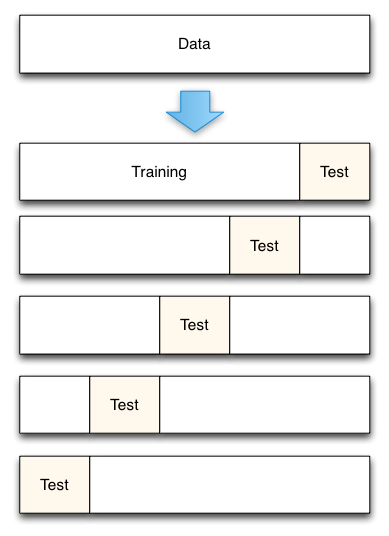!

In [ ]:
knn = KNeighborsClassifier(n_neighbors=19)
scores = cross_val_score(knn, X_scale, y, cv=5)
print(f"accuracy scores per fold are {np.round(scores,3)}. Average accuracy: {round(scores.mean(),3)}")

By using k-fold cross validation, we get a better sense of what we might expect the average model performance to be, given a training and testing dataset of the size we used in the procedure. While the number of estimates we have is small, we also do get some sense of the variance of performance estimates.

### Comparing cross-validation to train/test split

**Advantages of cross-validation:**

* More accurate estimate of out-of-sample accuracy
* More "efficient" use of data (every observation is used for both training and testing)

**Advantages of train/test split:**

* Runs K times faster than K-fold cross-validation
* Simpler to examine the detailed results of the testing process (but you could build this out yourself to get more insight)


**Cross-validation recommendations**
* K can be any number, but K=10 is generally recommended provided you have a reasonable amount of data
* For classification problems, stratified sampling (i.e., each set contains approximately the same percentage of samples of each target class as the complete set) is recommended for creating the folds. Depending on your model and which function you are using, `scikit-learn` may do this by default. Be sure to consult the documentation to double check. You also may want to consider if some additional dependencies (e.g., time) that mirror the situation in which you want to deploy the model might be wise for structuring cross-validaton. Random/random + stratified is not always the best strategy.
* Use nested cross validation (details below)

### Cross-validation for parameter tuning

In many machine learning models, multiple parameters must be set. Cross-validation can be used to determine what value to use for the parameter (or set of parameters). In our case, the parameter we are trying to find the best value for is k. This is conceptually similar to what we did using the train/test split method in which we computed the accuracy on the test set using different values of k. Here, we will get a more reliable estimate of the performance across values of k since we will be testing on more than one dataset.


In [ ]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
k_min = []
k_max = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scale, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    k_min.append(scores.min())
    k_max.append(scores.max())


In [ ]:
fig, ax = plt.subplots()
ax.plot(k_range, k_scores)
ax.fill_between(
    k_range, k_min, k_max, color='b', alpha=.15)
ax.set_ylim(ymin=.5, ymax=.8)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.title('Mean and Range of Accuracy from Cross-Validation')

### Cross-validation for model selection
In addition to parameter selection for a single ML model, we can also use cross-validation to evaluate several candidate models. Here, we will compare the best KNN model with logistic regression.

In [ ]:
# 5-fold cross-validation with the best-ish KNN model
knn = KNeighborsClassifier(n_neighbors=19)
knn_cv_score = cross_val_score(knn, X_scale, y, cv=5, scoring='accuracy')

# 5-fold cross-validation with logistic regression
logreg = LogisticRegression()
lr_cv_score = cross_val_score(logreg, X_scale, y, cv=5, scoring='accuracy')

print(f'KNN has mean accuracy of {round(knn_cv_score.mean(),3)} with a standard deviation of {round(knn_cv_score.std(),3)}')
print(f'Logistic regression has mean accuracy of {round(lr_cv_score.mean(),3)} with a standard deviation of {round(lr_cv_score.std(),3)}')


###Train-Validation-Test/Holdout Method
Progressively throughout this tutorial, we have moved closer and closer to best practices for evaluating models. However, there are still some cases, particularly for scientific papers, where we have remaining issues. Consider the case of the train/test method (with repeated model iteration) and with cross-validation to select parameters and/or compare models. If our goal is to deploy a model into a (low-risk) industry setting, this might be sufficient because after the model is deployed, we can evaluate it through additional online methods (e.g., A/B testing) or by re-calcluating our ML metrics again on data collected post deployment. By doing this, we have in effect created a new dataset for evaluation that is wholly independent from the data used to train the model since that data did not even exist when the model was built. We can then use information about our deployed model performance to iteratively improve it. In academic research contexts, the output is often static (e.g., in a paper published in a journal, which does not get updated). Thus, to generate an honest assessment of our model performance, we need to create a dataset that is *never used in the training process* on which to conduct the final performance evaluation.

In the train-validation-test method, we separate out a portion of our data that we will not use at all for other steps in the evaluation process. We can then conduct all of the steps we have already discussed using the data that was not withheld for the final test set. For example, of the remaining data, we will split it again into a training and validation set (or into multiple training and validation sets within cross validation), performing all steps of our evaluation. In most cases, once we have selected our best ML algorithm and determined which parameters to use with that model, we then train the model again using those selections on all the data in both the training and validation sets. Then as the final step, we test our model on the test data we withheld at the beginning and did not touch again.

You might be wondering how all this can be accomplished given that you don't have a ton of data to work with to begin with. **Nested cross-validation** is a strategy that may well be a good idea to embrance anyway, but it can be particularly helpful if you have a small dataset. This is a bit difficult to explain quickly, so at the end of this notebook, I have included snippets from Peter Ramadge's machine learning course documents and a recommended YouTube video. They contains a good explanation of nested cross validation.

In the next cell, I have provided a visual representation of this process.



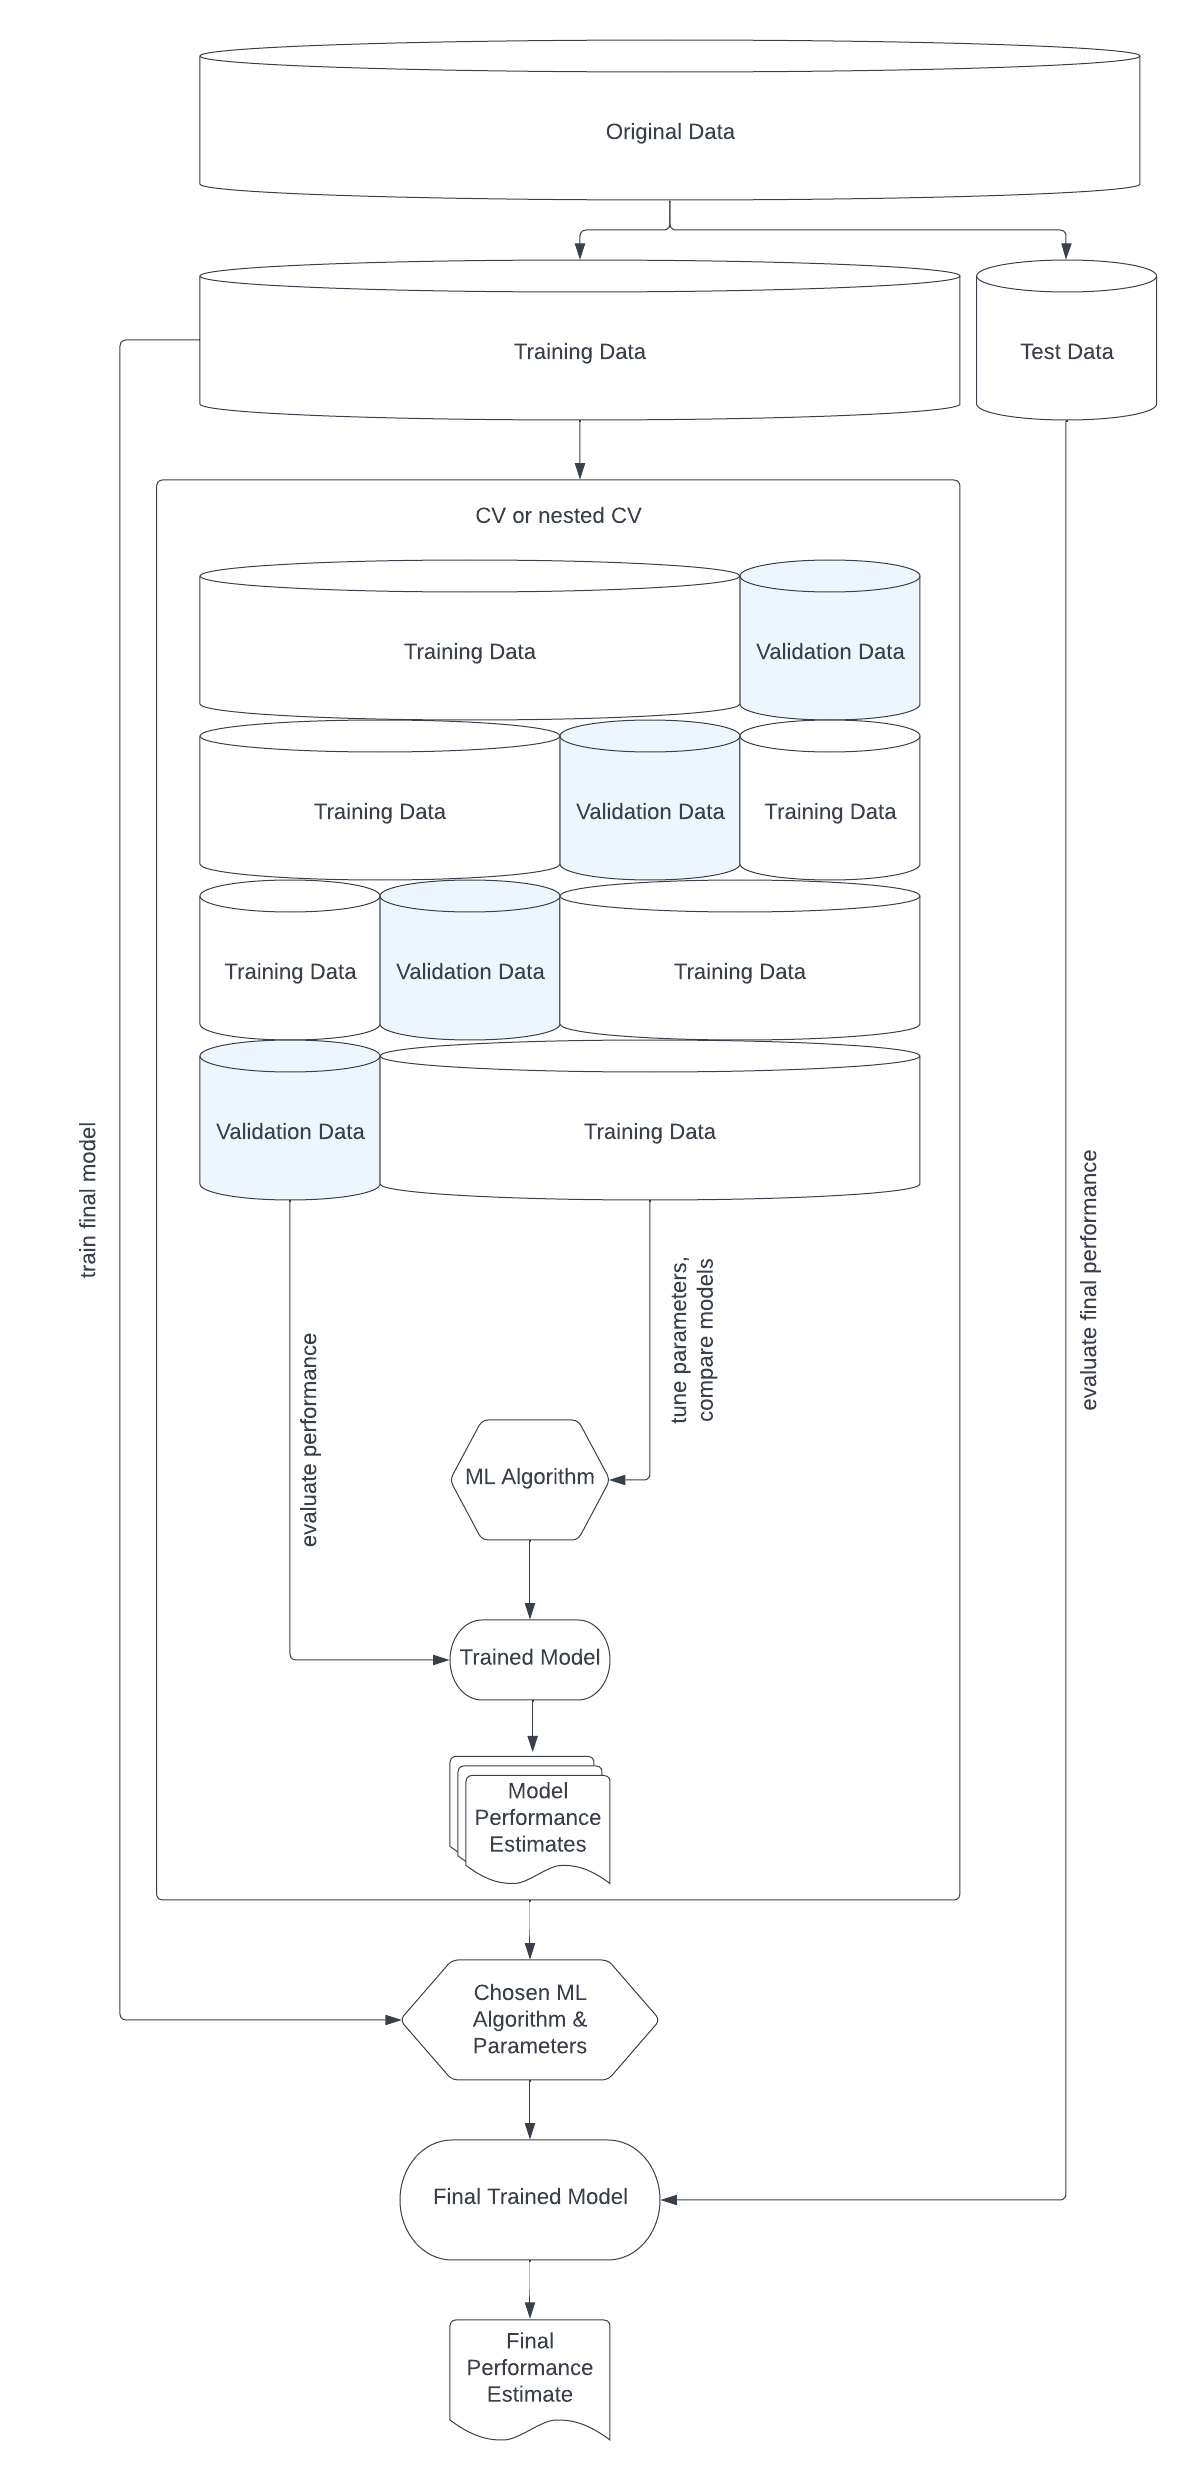

### Avoiding evaluation pitfalls

There are a number of pitfalls we want to avoid when evaluating machine learning models. We will touch briefly on some here, but I highly recommend both `scikit learn`'s [documentation on pitfalls](https://scikit-learn.org/stable/common_pitfalls.html) and Michael Lones' excellent, easy to understand [guide](https://arxiv.org/pdf/2108.02497.pdf), which I'll draw bits and pieces from below. Princeton recently held a [workshop on reproducibility](https://sites.google.com/princeton.edu/rep-workshop/) in science using machine learning, which also has great suggestions on how to improve your research.


**Leakage**:

> *Data leakage is a spurious relationship between the independent variables and the target variable that arises as an artifact of the data collection, sampling, or pre-processing strategy. Since the spurious relationship won’t be present in the distribution about which scientific claims are made, leakage usually leads to inflated estimates of model performance [Kapoor & Narayanan, 2022](https://arxiv.org/pdf/2207.07048.pdf)*

A commonly told cautionary tale about leakage:

> *Tomaso Poggio⁠, the director of M.I.T.’s Center for Brains, Minds and Machines, offered a classic parable used to illustrate this disconnect. The Army trained a program to differentiate American tanks from Russian tanks with 100% accuracy. Only later did analysts realized that the American tanks had been photographed on a sunny day and the Russian tanks had been photographed on a cloudy day. The computer had learned to detect brightness ([Murphy, 2017](https://www.nytimes.com/2017/10/09/science/stanford-sexual-orientation-study.html))*

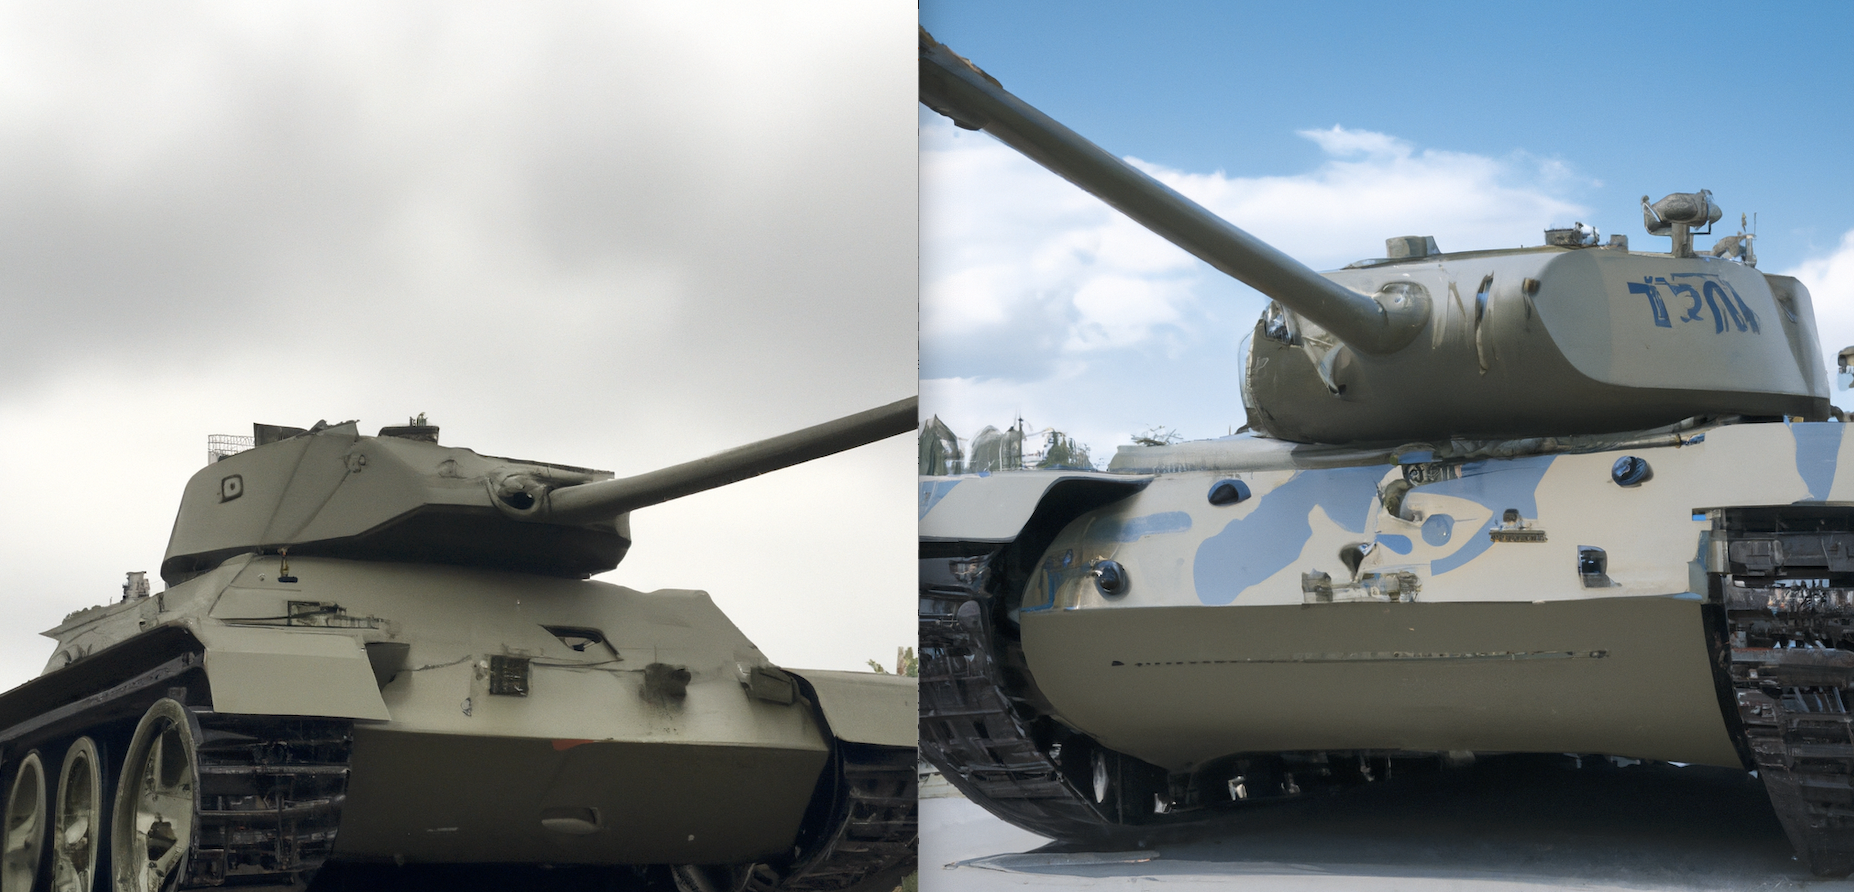

<div style="text-align: right">
    Bizzare tanks care of DALL-E https://labs.openai.com/
</div>


Despite being widely referenced, there has been [debate](https://www.gwern.net/Tanks) about whether this actually ever happened or even could happen. Still, the urban legend offers an easy to understand example of data leakage--if there is an artifact in the data collection process that is confounded with the outcome/target/response variable, estimates of model accuracy will be inflated compared to a real-world scenario where the confound is not present.

Think about this as being similar to experimental design. As much as possible, we want to minimize any differences between our treatment and control groups to ensure that our results have internal validity (and ideally, external validity).



*   **Don't look at ALL of your data**: A common piece of advice when developing machine learning models is to explore and visualize aspects of your dataset before doing anything else. This advice is generally helpful for informing the choices you make later about your model (e.g., featurization, imputation, etc.), but can also be a source of leakage. If you do exploratory analyses on **all** of your data, you have essentially gained information into your test data that could bias your model in ways that artificially inflate performanc estimates.

*   **Don't do feature selection on ALL your data**
There can be a lot of preprocessing steps in the machine learning process. In fact, these steps may constitute the bulk of your effort. Taking care (and leveraging subject matter expertise) in your preprocessing steps can dramatically improve your model performance, but sometimes these steps dramatically improve your model performance artificially. One way this can happen is if you select features or make choices about how to encode features using all your data. If you do this, implicit information about your test set will have leaked into your data before you even start training a model. Therefore, you should always make sure you set aside an appropriate holdout set **before** performing feature selection.

*   **Don't do data augmentation on ALL your data**
Like featurization and data exploration, augmentation procedures can be a source of leakage. For example, sometimes it makes sense to impute (i.e., fill in) null values where they exist in your dataset. If the strategy you use to determine which values to impute is based on all your data, this can be a source of leakage. For example, you might choose to impute null values in a feature based on that feature's mean. When you determine the mean, it should be based **only** on your training data. Then you can use the mean of the training data to impute the value in your test data. A similar approach also goes for the generation of synthetic data. Sometimes when data has severe class imbalance, techniques that generate synthetic data points that emulate the real data can be useful (e.g., [SMOTE](https://learn.microsoft.com/en-us/azure/machine-learning/component-reference/smote)). But, synthetic data should be developed to resemble the **training data only** not the entire dataset.

*   **Do report multiple metrics**
It's a good idea to report multiple metrics to allow the reader to better understand how your model performed. As one example we have already touched on, if your data has a class imbalance, accuracy alone is not an adequate measure of the model's performance. You will also need to include metrics that are less sensitive to class imbalances. Along similar lines, be very transparent about which metrics you are reporting. For example, if you provide an estimate of area under the curve (AUC) be clear about whether this AUC is from an ROC curve or a precision-recall curve. It is also often a good idea to report metrics at multiple stages in the process.

*   **Do use a legitimate baseline(s)**
In science, when we make a claim about something being good, we usually mean relative to something else that is less good. It's tempting to choose a strawman baseline that does not provide a legitimate comparison to your chosen modeling approach. Doing this anyway can result in [distortions in the scientific record](https://dl.acm.org/doi/abs/10.1145/3434185), which can also bleed into industry applications.

###Other considerations:
The following definitions are drawn from psychology, but they still apply in machine learning.
1. **Construct validity**: The extent to which your measure accurately assesses what it is intended to measure.
2. **Content validity**: The extent to which an instrument or metric covers all relevant parts of the construct it aims to measure.
3. **Fairness/ethical ramifications**: Especially in domains that touch humans in some way, we also may care about whether the model itself or aspects of the modeling process have ethical ramifications. There are some mathematical methods and tools for evaluating specific fairness criteria in particular contexts, but if your model interacts with humans, you would do well to at least consider whether some ethical quantitative/qualitative assessment should also be a part of your evaluation process.

### Nested Cross Validation

Earlier I mentioned that nested cross validation is a process that can overcome biases in non-nested cross validation that inflate performance estimates. We can use the k-fold method in the diagram below for hyperparameter selection, model training, and model testing. The steps to nested cross validation are as follows:

* Partition the entire training dataset into k balanced folds. Then use an outer loop to evaluate classifier performance for a given hyperparameter value. The outer loop iterates through the k folds by training on k − 1 folds, and testing on the corresponding left-out fold. This approach results in k estimates of model performance. This is the outer loop. If this doesn't make sense yet, read the rest of the procedure for the inner loops and come back. It makes more sense when you understand what else is going on.


* Inside the outer loop, we place two inner loops. At the start of each of the above k iterations, we place a selection loop that iterates through a designated set of hyperparameter values. For each value, we train and evaluate the resulting classifier.


* Here is where we use a third innermost loop. The simplest way to implement this inner loop is to use k − 2 of the k − 1 current training folds as the training subset and the left-aside fold of the present training folds as the validation subset. After the inner loop, we obtain k − 1 estimates of performance, yielding an assessment of the average performance of the current model and the spread of its performance about the average.


* After training and evaluating each hyperparameter value, we select the “best” value. We can then train the model using the selected value on all of the k − 1 folds of the current training data. Then report its performance on the left-out test fold. At the end of the k iterations in the outer loop, we have k best hyperparameter value selections and k sets of performance metrics.

This scheme is both complex and computationally expensive. However, it is appealing when training data is in short supply.

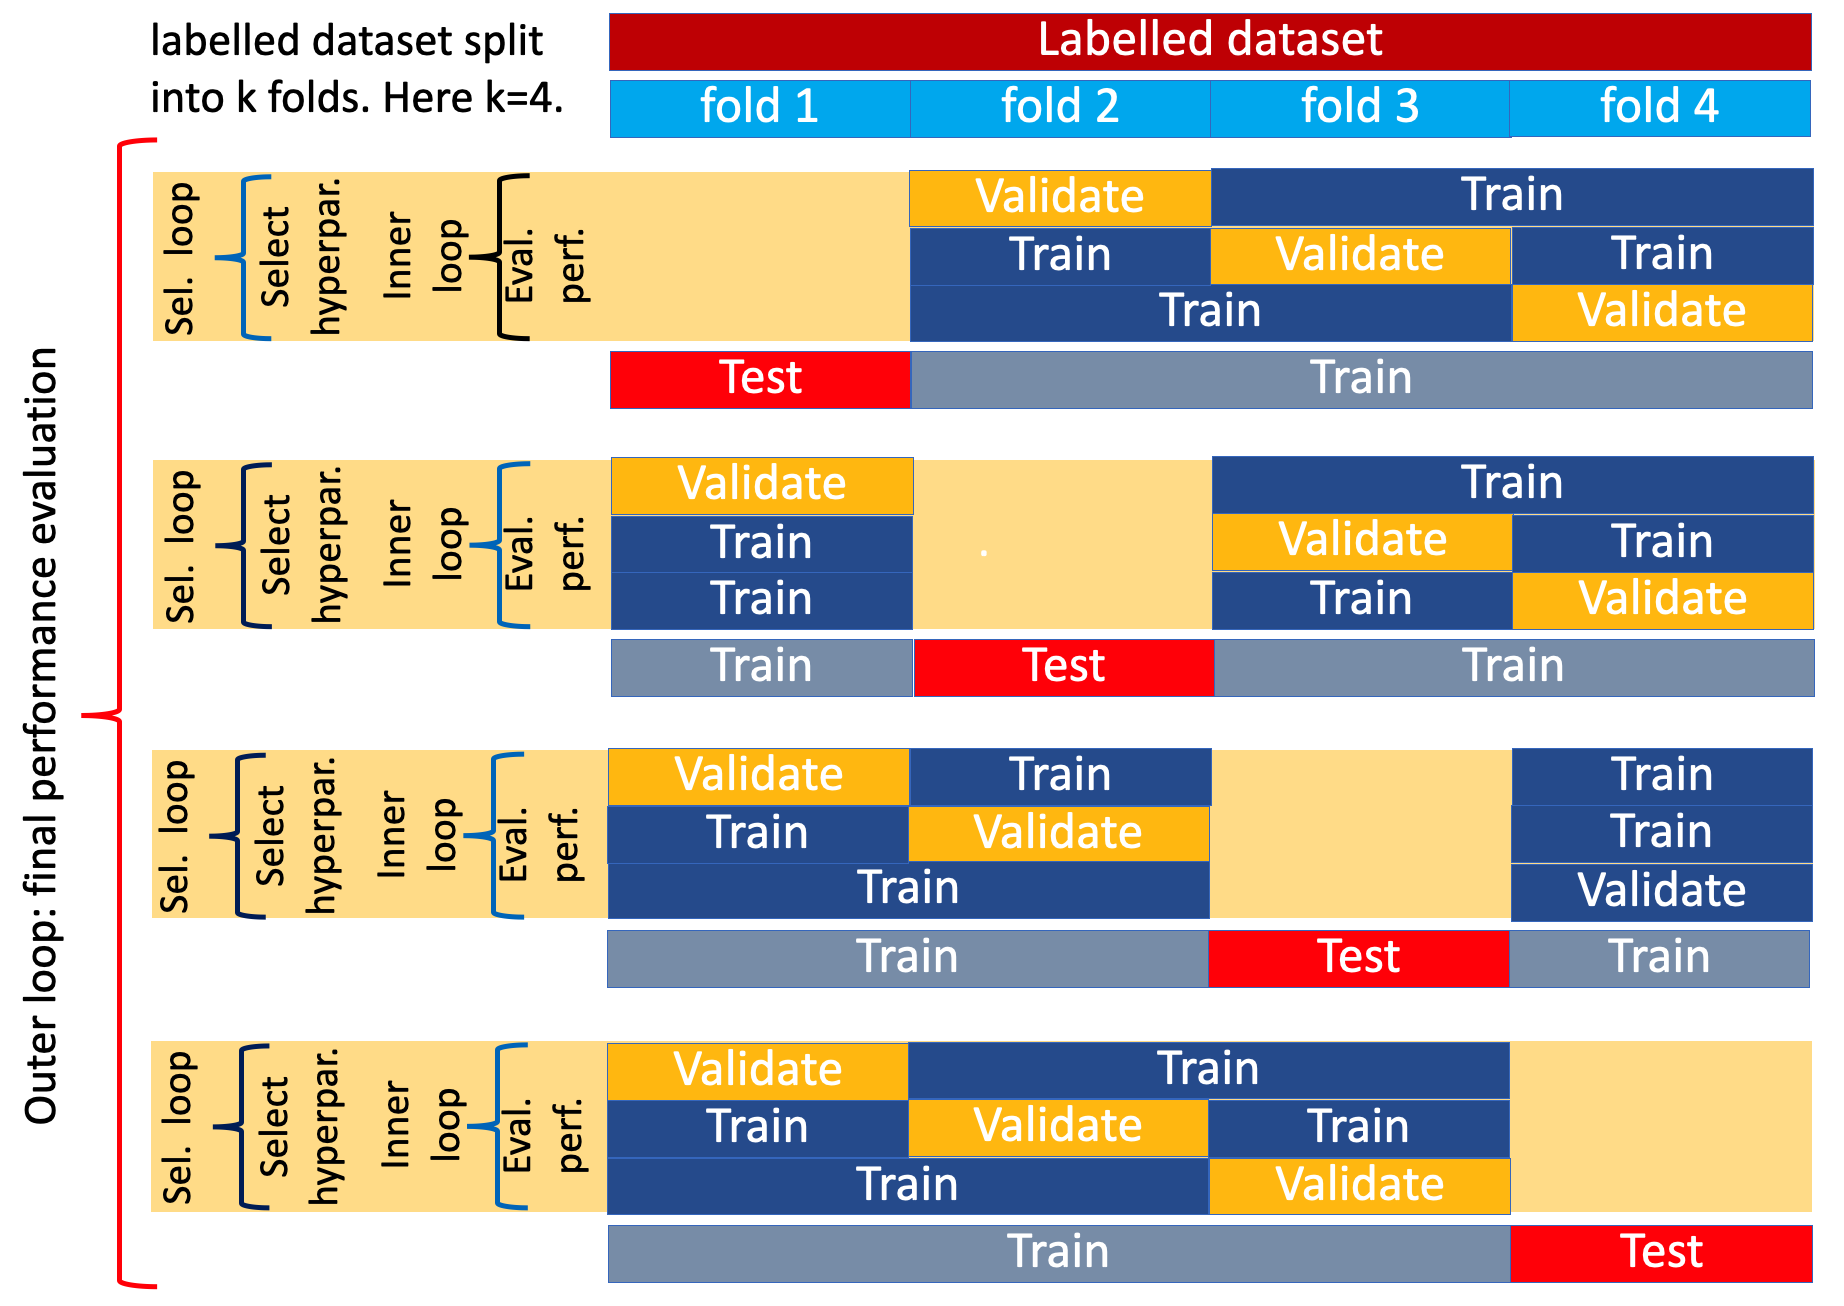

You can also check out [this video](https://www.youtube.com/watch?v=XXFLFWHP9Nc) from Sebastian Raschka, which also provides a pretty good explanation of this.

<font size="1">

**Notes on source material**
    
* Much of this workshop notebook draws heavily from [this notebook](https://github.com/justmarkham/DAT8/blob/master/notebooks/09_model_evaluation.ipynb) because it contains a great explaination of evaluation paradigms. Some material was also adapted from maykulkarni's machine learning notebooks [repo](https://github.com/maykulkarni), and other parts were (lightly) adapted from [this tutorial](https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/). Parts of the cross-validation section are adapted from [this notebook](https://github.com/justmarkham/DAT8/blob/master/notebooks/13_cross_validation.ipynb)
    
* The rad decision boundary plot was adapted from [this post](https://www.tvhahn.com/posts/beautiful-plots-decision-boundary/)

* The NBA data for the KNN example was generated using the [basketball reference scraper repo](https://github.com/vishaalagartha/basketball_reference_scraper) to scrape NBA statistics from the website https://www.basketball-reference.com. Source data extracted using this repo were transformed into their current format by adapting code from [this tutorial](https://towardsdatascience.com/simple-modeling-of-nba-positions-using-the-k-nearest-neighbors-machine-learning-algorithm-223b8addb08f) on KNN. You can access my complete code for generating the data [here](https://github.com/amywinecoff/baskeball-scraper/blob/main/get_basketball_data.ipynb). I apologize in advance for the chaos of this repo.
    
* As noted before, the section on nested cross validation is lifted with little adaptation from Peter Ramadge's Machine Learning and Pattern Recognition.
    
* The pitfalls section draws from Michael Lones' [guide](https://arxiv.org/pdf/2108.02497.pdf).

</font>